In [1]:
%matplotlib inline

# Intensity transformation

 ## Sigmoid

Text(0, 0.5, 'output image graylevel')

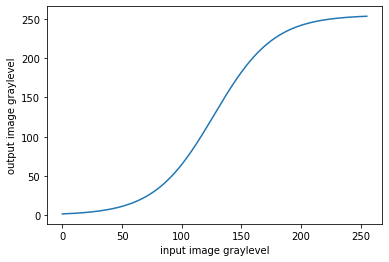

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def sigmd(r,w,s):
    #  w = omega, s = sigma
    return 255.0 / (1.0 + np.exp(-(r - w) / s) )

p=np.arange(0,256)
q=sigmd(p,127,25)

plt.plot(p,q)
plt.xlabel('input image graylevel')
plt.ylabel('output image graylevel')

Test sigmoid windowing function with DICOM image, PIG_CT

In [5]:
#import library imageio and read the file PIG_CT
import imageio
im=imageio.imread('../../Images/PIG_CT')
print('maximum grayscale value',np.max(im))
print('minimum grayscale value', np.min(im))

maximum grayscale value 1162
minimum grayscale value -1024


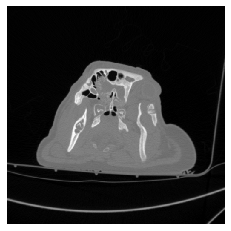

In [6]:
import matplotlib.pyplot as plt
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.show()

(512, 512)
254.99999813466485
7.883738794821273e-22


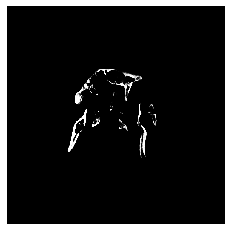

In [7]:
imSig= sigmd(im, 600,30)
print(imSig.shape)

print(np.max(imSig))
print(np.min(imSig))
plt.imshow(imSig,cmap='gray')
plt.axis('off')
plt.show()

## Ramp

Design ramp function of form $y = ax + b$

We define the minimum and maximum grayscale levels of the input image, which will be stretched to 0 -> 255 in the output image, $minp$ and $maxp$.  

For convenience, we define where the function will cross the x axis. So we modify the value of $x$ and set $b=0$.

$y = a(x-minp)+b$. 

Here $a = \dfrac{255.0}{maxp - minp}$. 

The function should set negative output grayscale values to zero

And output grayscale values > the grascale levels in the output image to zero (i.e. 255 in this case).  

Text(0, 0.5, 'output image graylevel')

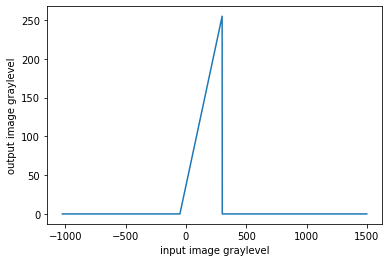

In [8]:
def ramp(r):
    minp = -50
    maxp = 300
    nlevels = 255.0
    a = (nlevels / (maxp - minp))
    ret =  a*(r - minp)
    ret[ret < 0] = 0
    ret[ret > nlevels] = 0
    
    return ret

p=np.arange(-1024,1500)
q=ramp(p)

plt.plot(p,q)
plt.xlabel('input image graylevel')
plt.ylabel('output image graylevel')

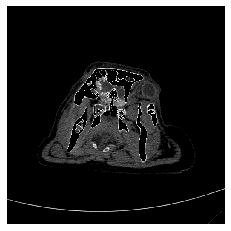

In [9]:
imRamp = ramp(im)
plt.imshow(imRamp,cmap='gray')
plt.axis('off')
plt.show()

## Scikit-image Gallery

Scikit-image Gallery: (e.g. coins, camera,immunohistochemistry, etc)

{https://scikit-image.org/docs/dev/auto_examples/data/plot_general.html#sphx-glr-auto-examples-data-plot-general-py}
{https://scikit-image.org/docs/dev/auto_examples/data/plot_scientific.html#sphx-glr-auto-examples-data-plot-scientific-py}


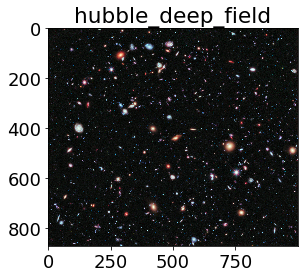

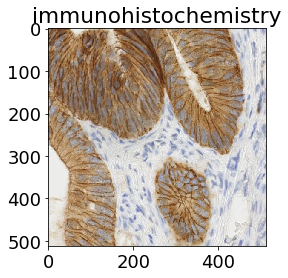

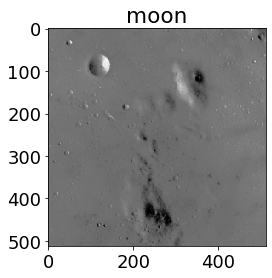

In [10]:
from skimage import data
import matplotlib


matplotlib.rcParams['font.size'] = 18

images = ('hubble_deep_field',
          'immunohistochemistry',
          'moon'
          )


for name in images:
    caller = getattr(data, name)
    image = caller()
    plt.figure()
    plt.title(name)
    if image.ndim == 2:
        plt.imshow(image, cmap=plt.cm.gray)
    else:
        plt.imshow(image)

plt.show()

## Inversion of image intensities (negatives)

maximum grayscale value 252
minimum grayscale value 1


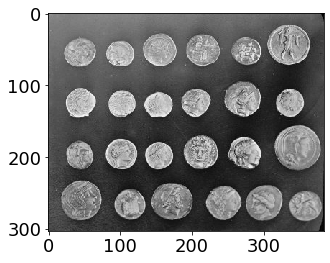

In [11]:
#inversion of image intensities
from skimage import data
im=data.coins()
print('maximum grayscale value',np.max(im))
print('minimum grayscale value', np.min(im))
plt.imshow(im,cmap='gray')

Text(0, 0.5, 'output image graylevel')

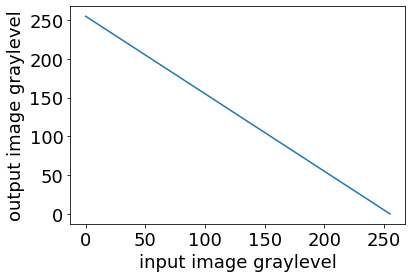

In [12]:
def neg(r):
    return  255 - r

p=np.arange(0, 256)
q=neg(p)

plt.plot(p,q)
plt.xlabel('input image graylevel')
plt.ylabel('output image graylevel')

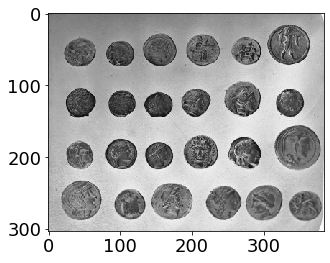

In [13]:
imNegative = neg(im) #negative of coins image
plt.imshow(imNegative,cmap='gray')

In [15]:
import imageio

im=imageio.imread("../../Images/PIG_MR")
print("image type:",type(im))
print("Shape of image array:", im.shape)

image type: <class 'imageio.core.util.Array'>
Shape of image array: (512, 512)


## Histogram

uint8 image has 3 grayscale levels
100, 50, 20. As áreas são quadrados,
tamanho 100 × 100, 60 × 60, e
20 × 20.

{https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html}

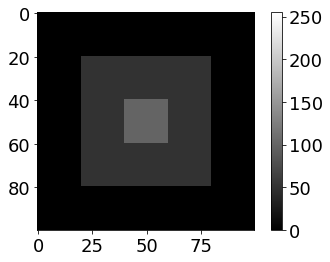

In [16]:
im = np.zeros((100,100),dtype=np.uint8)
im[20:80,20:80] = 50
im[40:60,40:60] = 100

# Force the image to be displayed with grayscale 0-255
plt.imshow(im,vmin=0, vmax=255, cmap='gray')
plt.colorbar()

### Image histogram and flatten image (vectorize)

In [17]:
a = np.array([[1,2,3], [4,5,6], [7,8,9]])
print('a=',a)
print('row major flatten: a.flatten()=',  a.flatten() )
print("row major flatten: a.flatten('C')=",a.flatten('C'), "C-style" )
print("col major flatten: a.flatten('F')=",a.flatten('F'), "Fortran-style" )



a= [[1 2 3]
 [4 5 6]
 [7 8 9]]
row major flatten: a.flatten()= [1 2 3 4 5 6 7 8 9]
row major flatten: a.flatten('C')= [1 2 3 4 5 6 7 8 9] C-style
col major flatten: a.flatten('F')= [1 4 7 2 5 8 3 6 9] Fortran-style


hist =  [0 1 1 1 1 1 1 1 1 1]
bins =  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


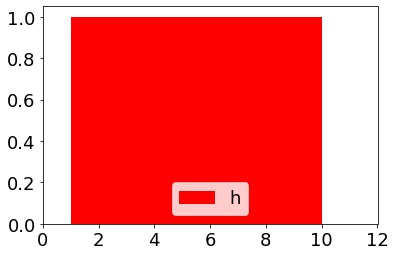

In [18]:
hist,bins = np.histogram(a.flatten(),10,[0,10])
print('hist = ',hist)
print('bins = ',bins)

plt.hist(a.flatten(), 10, [0,10], color = 'r')
plt.xlim([0,12])
plt.legend(('histogram'), loc = 'lower center')
plt.show()

In [19]:
hist,bins = np.histogram(a.flatten(),5,[0,10])
print('hist = ',hist)
print('bins = ',bins)


hist =  [1 2 2 2 2]
bins =  [ 0.  2.  4.  6.  8. 10.]


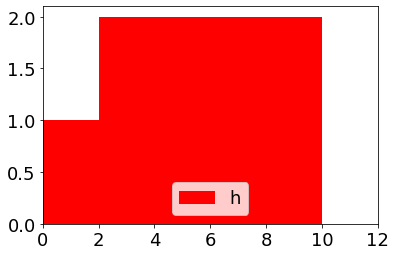

In [20]:
plt.hist(a.flatten(), 5, [0,10], color = 'r')
plt.xlim([0,12])
plt.legend(('histogram'), loc = 'lower center')
plt.show()

hist:  [0 1 1 1 1 1 1 1 1 1]
cdf: [0 1 2 3 4 5 6 7 8 9]
cdf_normalized: [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


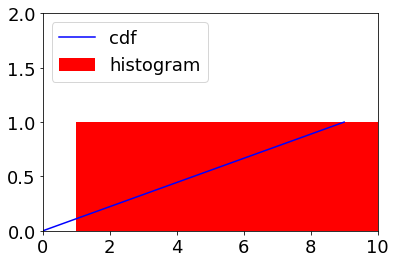

In [21]:
hist,bins = np.histogram(a.flatten(),10,[0,10])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
print('hist: ',hist)
print('cdf:', cdf)
print('cdf_normalized:',cdf_normalized)


plt.plot(cdf_normalized, color = 'b')
plt.hist(a.flatten(),10,[0,10], color = 'r')
plt.xlim([0,10])
plt.ylim([0,2])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### Plot histogram of image

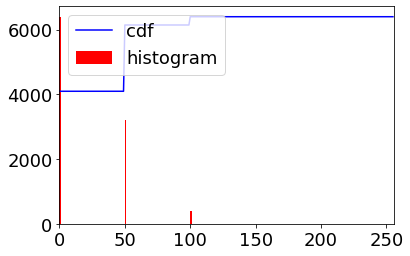

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

hist,bins = np.histogram(im.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(im.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

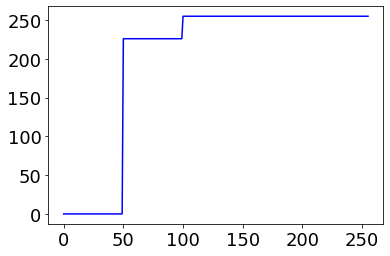

In [23]:
cdf_m1 = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m1 - cdf_m1.min())*255/(cdf_m1.max()-cdf_m1.min())

cdf = np.ma.filled(cdf_m,0).astype('uint8')
plt.plot(cdf, color = 'b')
plt.show()

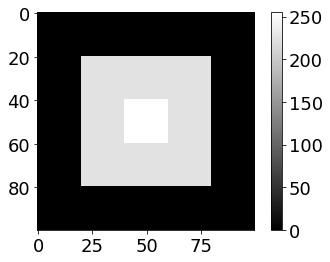

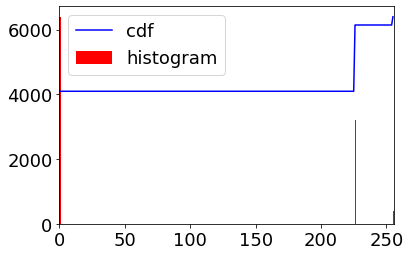

In [24]:
# Use cdf to create new image
im2 = cdf[im]
plt.imshow(im2,cmap='gray')
plt.colorbar()
plt.show()

# histogram and bins of new image
hist,bins = np.histogram(im2.flatten(),256,[0,256])

# create cdf of new image
cdf2 = hist.cumsum()

# plot histogram and normalized cdf of new image
cdf_normalized = cdf2 * hist.max()/ cdf2.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(im2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Histogram equalisation - moon image

Based on a tutorial - see https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html

### Create function to plot histogram and cumulative distribution function (cdf)

In [25]:
#plot histogram and cdf
def plot_hist_cdf(I):
    hist,bins = np.histogram(I.flatten(),256,[0,256])

    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    plt.plot(cdf_normalized, color = 'b')
    plt.hist(I.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.show()

### Load moon image, plot it, plot histogram and CDF.
### Then perform hist equalisation, and repeat plots.

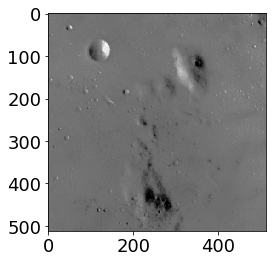

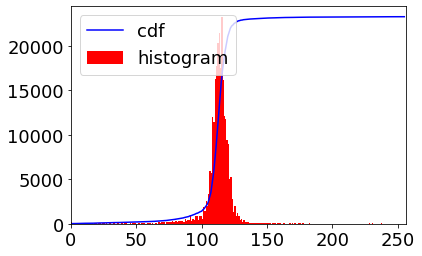

NameError: name 'exposure' is not defined

In [26]:
import numpy as np
import cv2
#from scipy.integrate import cumtrapz
from scipy.stats import norm
from matplotlib import pyplot as plt

# Load an example image
img = data.moon()

#plot moon image
plt.imshow(img,cmap='gray')
plt.show()

#plot image after histogram equalization
plot_hist_cdf(img)

# Equalization
img_eq = exposure.equalize_hist(img)

#plot moon image
plt.imshow(img_eq,cmap='gray')
plt.show()

img_eq = img_eq*256 #Need to multiply by 256, since pixels are not in range [0.1).

#plot image after histogram equalization
plot_hist_cdf(img_eq)




### My analysis:  We can see that the cdf is close to linear (linear for a digital image, anyway)



### The moon surface seems to be improved in contrast, while specific features, such as the dark and light of moon craters, seems to be worse.  This is because the surface is the largest part of the image, and the craters are small features.  

### In a medical image, we might not want to risk using histogram equalisation, since it might hide important but small features.